# 📈 Previsão de Preço da Ação PETR4 com LSTM (Keras/TensorFlow)

Este notebook tem como objetivo utilizar redes neurais recorrentes (LSTM) para prever o preço de fechamento da ação PETR4 com base em dados históricos da B3.


In [1]:
!pip install yfinance scikit-learn tensorflow matplotlib pandas

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

df = yf.download("PETR4.SA", start="2018-01-01", end="2025-07-01")
df = df[['Close']]
df.dropna(inplace=True)
df.tail()

/tmp/ipython-input-2-4139795207.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("PETR4.SA", start="2018-01-01", end="2025-07-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,PETR4.SA
Date,
2025-06-24,31.370001
2025-06-25,31.209999
2025-06-26,31.459999
2025-06-27,31.209999
2025-06-30,31.379999


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Função para janelas de tempo
def create_dataset(dataset, window_size=60):
    X, y = [], []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i - window_size:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_dataset(scaled_data, window_size)

# Reshape para [amostras, passos de tempo, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [4]:
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [5]:
# Modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0230 - val_loss: 0.0164
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.8918e-04 - val_loss: 0.0038
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 8.6980e-04 - val_loss: 0.0047
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 8.7148e-04 - val_loss: 0.0011
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 7.9819e-04 - val_loss: 0.0013
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 9.2155e-04 - val_loss: 0.0036
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 7.2762e-04 - val_loss: 0.0027
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


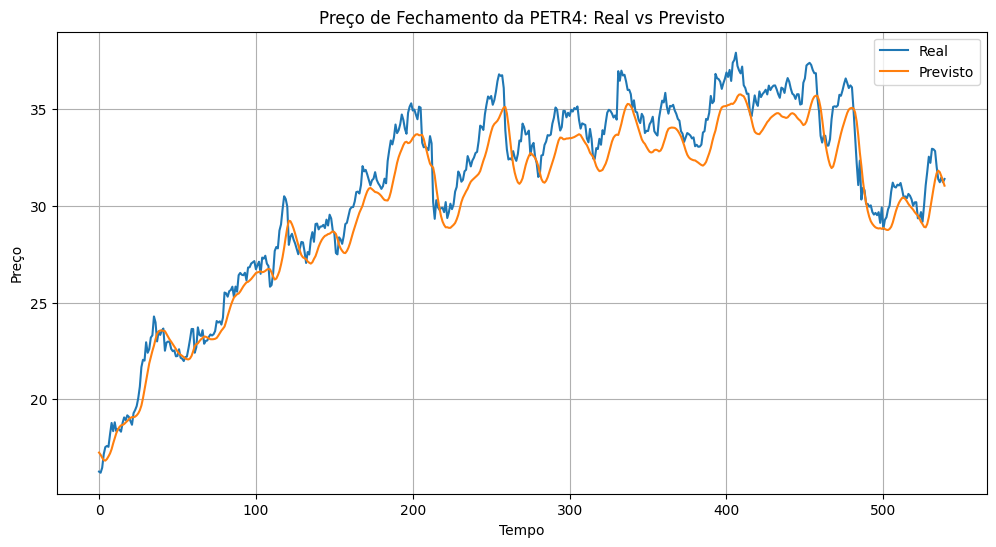

In [7]:
# Previsão
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(actual, label="Real")
plt.plot(predictions, label="Previsto")
plt.title("Preço de Fechamento da PETR4: Real vs Previsto")
plt.xlabel("Tempo")
plt.ylabel("Preço")
plt.legend()
plt.grid()
plt.show()